In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#import modules

import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import sklearn 
import scipy.special as spsp
from scipy.optimize import minimize
import scipy.stats as spst
import seaborn as sns 
from statsmodels.formula.api import logit

In [0]:
link="https://drive.google.com/open?id=1dN93GlOgXUfTfaDkeewbol6USNExovnJ"

_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('customers.csv')  
Customers = pd.read_csv('customers.csv')
Customers.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize



# Layer1:

In [0]:
df=pd.read_csv('customers.csv')
X = df.drop(columns=['Customer','Response'])
X.columns=['State', 'CustomerLifetimeValue', 'Coverage', 'Education',
       'EffectiveToDate', 'EmploymentStatus', 'Gender', 'Income',
       'LocationCode', 'MaritalStatus', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'PolicyType',
       'Policy', 'RenewOfferType', 'SalesChannel', 'TotalClaimAmount',
       'VehicleClass', 'VehicleSize']

In [0]:
candidates = ["C(State)", "np.log(CustomerLifetimeValue)", "C(Coverage)","C(Education)",
 "C(EmploymentStatus)", "C(Gender)", "Income", "C(LocationCode)", \
 "C(MaritalStatus)", 'np.log(MonthlyPremiumAuto)', 'C(MonthsSinceLastClaim)',\
 'MonthsSincePolicyInception', 'NumberofOpenComplaints', 'C(Policy)',\
    'C(SalesChannel)', 'TotalClaim Amount', 'C(VehicleClass)', 'C(VehicleSize)']
print("length:", len(candidates))

length: 18


In [0]:
from statsmodels.formula.api import mnlogit
model = mnlogit(formula='RenewOfferType~C(State)', data=X).fit()
model.predict()

Optimization terminated successfully.
         Current function value: 1.265822
         Iterations 5


array([[0.42481203, 0.31077694, 0.15413534, 0.11027569],
       [0.40869055, 0.32354668, 0.15560775, 0.11215502],
       [0.41496599, 0.32086168, 0.14739229, 0.11678005],
       ...,
       [0.40507937, 0.32063492, 0.16253968, 0.11174603],
       [0.40507937, 0.32063492, 0.16253968, 0.11174603],
       [0.40507937, 0.32063492, 0.16253968, 0.11174603]])

In [0]:
bic_list = []
for string in candidates:
    try:
        formula = "RenewOfferType~"+string
        model=mnlogit(formula=formula, data=X).fit()
        bic_list.append(model.bic)  
    except:
        print('')
print(candidates[np.argmin(bic_list)])

Optimization terminated successfully.
         Current function value: 1.265822
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.257633
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.263564
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.261701
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.242647
         Iterations 6
Optimization terminated successfully.
         Current function value: 1.264728
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.245909
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.261843
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.249972
         Iterations 5
Optimization terminated successfully.
         Current function value: 1.260430
  

In [0]:
candidate = ["C(State)", "np.log(CustomerLifetimeValue)", "C(Coverage)","C(Education)",
 "C(EmploymentStatus)", "C(Gender)", "C(LocationCode)", \
 "C(MaritalStatus)", 'np.log(MonthlyPremiumAuto)', 'C(MonthsSinceLastClaim)',\
 'MonthsSincePolicyInception', 'NumberofOpenComplaints', 'C(Policy)',\
    'C(SalesChannel)', 'TotalClaimAmount', 'C(VehicleClass)', 'C(VehicleSize)']
full=len(candidate)
best_model = "RenewOfferType~Income"
BEST_BIC = np.inf
for i in np.arange(full-1,-1,-1):
    BIC = np.empty(i+1)
    for j in range(i+1):
        candidate_formula = best_model+"+"+candidate[j]
        model = mnlogit(formula=candidate_formula,data=X).fit()
        BIC[j] = model.bic
        print(BIC)
    if BEST_BIC>np.min(BIC):
        Add_i=np.where(BIC==np.min(BIC))[0][0]
        best_model=best_model+"+"+candidate[Add_i]
    #print(Add_i)
        print("variable added:", candidate[Add_i])
   # print(best_model)
        BEST_BIC=np.min(BIC)
        candidate=np.delete(candidate,Add_i)    
    else:
        break
#the best string is stored in identifier best_model;

Optimization terminated successfully.
         Current function value: 1.245755
         Iterations 5
[2.29216094e+004 3.95252517e-323 5.43472210e-323 1.18575755e-322
 3.95252517e-323 4.44659081e-323 4.44659081e-323 8.39911598e-323
 7.90505033e-323 9.38724727e-323 7.41098469e-323 6.42285340e-323
 7.90505033e-323 6.42285340e-323 9.38724727e-323 6.91691904e-323
 5.92878775e-323]
Optimization terminated successfully.
         Current function value: 1.236068
         Iterations 6
[2.29216094e+004 2.26625641e+004 5.43472210e-323 1.18575755e-322
 3.95252517e-323 4.44659081e-323 4.44659081e-323 8.39911598e-323
 7.90505033e-323 9.38724727e-323 7.41098469e-323 6.42285340e-323
 7.90505033e-323 6.42285340e-323 9.38724727e-323 6.91691904e-323
 5.92878775e-323]
Optimization terminated successfully.
         Current function value: 1.243337
         Iterations 6
[2.29216094e+004 2.26625641e+004 2.28227117e+004 1.18575755e-322
 3.95252517e-323 4.44659081e-323 4.44659081e-323 8.39911598e-323
 7.90505

In [0]:
best_model

'RenewOfferType~Income+C(SalesChannel)+np.log(CustomerLifetimeValue)+C(MaritalStatus)+MonthsSincePolicyInception+NumberofOpenComplaints+C(Gender)'

In [0]:
N = 1000
def choice_mapping(X):
    guess = np.random.rand(len(X))
    return int(guess<X[0].values) + int(guess<(X[0].values+X[1].values)) + int(guess<(X[0].values+X[1].values+X[2].values))+ int(guess<(X[0].values+X[1].values+X[2].values+X[3].values))
best_mnlogit = mnlogit(formula=best_model, data=X).fit()

sample = X.sample(N, replace=True)

Optimization terminated successfully.
         Current function value: 1.201568
         Iterations 6


# Layer2: Trian the model

## Variable transformation

Factors That Affect Car Accident Rates
https://www.moneycrashers.com/factors-affect-car-insurance-rates/

1. Gender and Age：
Young men usually incur higher rates than young women as statistically, more male teenagers have accidents than female teenagers. However, older men generally have better rates than older women.

2. Marital Status
Married people tend to have fewer accidents than single people; therefore, getting married (especially for men) can significantly lower your rate. 

3. Where You Live
Because most traffic accidents occur close to home, the area you live in greatly affects your rates. More densely populated neighborhoods with more cars mean you are at a higher risk of accidents, theft, and collisions with injuries.
Repairing your car also costs more in some areas, and some areas have higher rates of theft. Plus, in this economy, many urban areas with high unemployment rates have a lot of uninsured drivers, as many people can’t afford to insure their cars. 
4. Vehicle Size
Larger cars are generally safer than smaller cars in an accident. Therefore, many larger cars with good safety ratings have lower premiums than smaller cars with otherwise similar ratings. 



For numerical attributes: (from EDA)

1.  lifetime value
2.  income
3.  total claim amount
4.  months since last claim 

The rest of numerical attributes were hard to conclude because their average in acceptance group and rejection group were very similar

(array([2317.,  522., 1381.,  893.,  749.,  791.,  759.,  698.,  545.,
         479.]),
 array([    0. ,  9998.1, 19996.2, 29994.3, 39992.4, 49990.5, 59988.6,
        69986.7, 79984.8, 89982.9, 99981. ]),
 <a list of 10 Patch objects>)

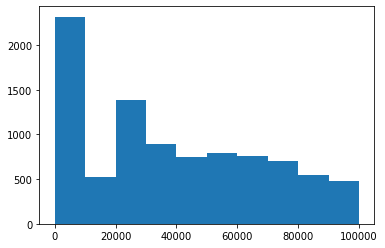

In [0]:
plt.hist(Customers["Income"].values)

# Do not take log on (Income)

Text(0.5, 1.0, 'log(Total Claim Amount)')

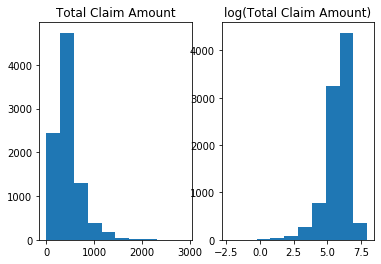

In [0]:
fig, axs = plt.subplots(1, 2)
axs[0,].hist(Customers["Total Claim Amount"].dropna().values)
axs[0].set_title('Total Claim Amount')
axs[1].hist(np.log(Customers["Total Claim Amount"].dropna().values))
axs[1].set_title('log(Total Claim Amount)')
# take log(Total Claim Amount)

(array([1369., 1012., 1168.,  855., 1112.,  706.,  901.,  604.,  779.,
         628.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <a list of 10 Patch objects>)

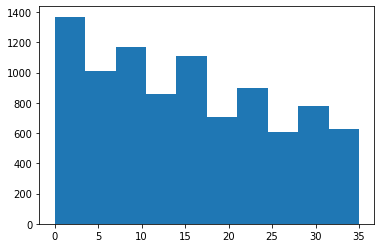

In [0]:
plt.hist(Customers["Months Since Last Claim"].values)
# Do not take log on (Months Since Last Claim)

In [0]:
# Besides these facoter, whether other factors have influences on the receive rate
Customers.Response = Customers.Response.apply(lambda X : 0 if X == 'No' else 1)
# Log Transformation
Customers["Total Claim Amount"] = np.log(Customers["Total Claim Amount"])

Customers = Customers.rename(columns={"Months Since Last Claim":"Months_Since_Last_Claim", \
                                      "Location Code":"Location_Code",\
                                      "Marital Status":"Marital_Status",\
                                      "Vehicle Size":"Vehicle_Size",\
                                      "Customer Lifetime Value":"Customer_Lifetime_Value",\
                                      "Policy Type":"Policy_Type",\
                                      "Sales Channel":"Sales_Channel",\
                                      "Vehicle Class":"Vehicle_Class",\
                                      "Total Claim Amount":"Total_Claim_Amount",\
                                      "Months Since Last Claim":"Months_Since_Last_Claim"})

# Model

## Offer1

In [0]:
Customers_1 = Customers[Customers["Renew Offer Type"]=="Offer1"]
Customers_1.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly Premium Auto,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy_Type,Policy,Renew Offer Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,5.952753,Two-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,6.339428,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,1,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,5.773309,Four-Door Car,Medsize


In [0]:
candidate_variables=np.array(["C(Education)","C(Gender)","C(Location_Code)","C(Marital_Status)","C(Vehicle_Size)","EmploymentStatus",\
                              "C(Policy_Type)", "C(Policy)","C(Sales_Channel)","C(Vehicle_Class)","Income","Total_Claim_Amount","Months_Since_Last_Claim"])

full=len(candidate_variables)
best_model="Response~C(State)"
BEST_AIC=np.inf

model1=logit(formula=best_model,data=Customers_1).fit()

for i in np.arange(full-1,-1,-1):
  AIC=np.empty(i+1)
  for j in range(i+1):
    candidate_formula=best_model+"+"+candidate_variables[j]
    model1=logit(formula=candidate_formula,data=Customers_1).fit()
    AIC[j]=model1.aic
  print("AIC of current model:", AIC)
  if BEST_AIC>np.min(AIC):
    Add_i=np.where(AIC==np.min(AIC))[0][0]
    best_model=best_model+"+"+candidate_variables[Add_i]
    print("variable added:", candidate_variables[Add_i])
    BEST_AIC=np.min(AIC)
    candidate_variables=np.delete(candidate_variables,Add_i)    
  else:
    break
best_model1 = best_model
print(best_model1)

Optimization terminated successfully.
         Current function value: 0.436695
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.434572
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436565
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.419391
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.424952
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.381520
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.436648
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.435779
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428363
  

### Offer2

In [0]:
Customers_2 = Customers[Customers["Renew Offer Type"]=="Offer2"]
Customers_2.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly Premium Auto,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy_Type,Policy,Renew Offer Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
5,OC83172,Oregon,8256.297800,1,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,5.071310,Two-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,0,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,6.053330,Four-Door Car,Medsize
11,VQ65197,California,8197.197078,0,Basic,College,1/6/11,Unemployed,F,0,Suburban,Married,110,27,87,0,3,Personal Auto,Personal L3,Offer2,Agent,6.269096,SUV,Medsize
12,DP39365,California,8798.797003,0,Premium,Master,2/6/11,Employed,M,77026,Urban,Married,110,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,6.157042,Four-Door Car,Medsize
13,SJ95423,Arizona,8819.018934,1,Basic,High School or Below,1/10/11,Employed,M,99845,Suburban,Married,110,23,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,6.269096,SUV,Medsize


In [0]:
candidate_variables=np.array(["C(Education)","C(Gender)","C(Location_Code)","C(Marital_Status)","C(Vehicle_Size)",\
                              "C(Policy_Type)", "C(Policy)","C(Sales_Channel)","C(Vehicle_Class)","C(Vehicle_Size)","Income","Total_Claim_Amount","Months_Since_Last_Claim"])
#EmploymentStatus not included
full=len(candidate_variables)
best_model="Response~C(State)"
BEST_AIC=np.inf

model2=logit(formula=best_model,data=Customers_2).fit()

for i in np.arange(full-1,-1,-1):
  AIC=np.empty(i+1)
  for j in range(i+1):
    candidate_formula=best_model+"+"+candidate_variables[j]
    model2=logit(formula=candidate_formula,data=Customers_2).fit()
    AIC[j]=model2.aic
  print("AIC of current model:", AIC)
  if BEST_AIC>np.min(AIC):
    Add_i=np.where(AIC==np.min(AIC))[0][0]
    best_model=best_model+"+"+candidate_variables[Add_i]
    print("variable added:", candidate_variables[Add_i])
    BEST_AIC=np.min(AIC)
    candidate_variables=np.delete(candidate_variables,Add_i)    
  else:
    break
best_model2 = best_model
print(best_model2)

Optimization terminated successfully.
         Current function value: 0.543478
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541883
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.543432
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.538048
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.537829
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542494
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.542567
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.541169
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531405
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541850
  

## Offer3

In [0]:
Customers_3 = Customers[Customers["Renew Offer Type"]=="Offer3"]
Customers_3.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly Premium Auto,Months_Since_Last_Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy_Type,Policy,Renew Offer Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,7.031268,Four-Door Car,Medsize
17,OE15005,California,3945.241604,0,Basic,College,1/5/11,Medical Leave,M,28855,Suburban,Married,101,12,59,0,1,Personal Auto,Personal L2,Offer3,Call Center,6.473029,SUV,Medsize
34,SK67821,Oregon,4932.916345,0,Basic,Bachelor,2/13/11,Employed,F,37260,Rural,Married,62,19,42,0,8,Corporate Auto,Corporate L1,Offer3,Web,2.736811,Four-Door Car,Medsize
38,CM61827,Oregon,3090.034104,0,Extended,Bachelor,1/25/11,Unemployed,M,0,Suburban,Single,90,7,79,0,1,Personal Auto,Personal L2,Offer3,Agent,6.473891,Two-Door Car,Small
40,QG25316,Nevada,2652.061785,0,Basic,High School or Below,1/18/11,Unemployed,F,0,Suburban,Married,70,7,1,1,1,Corporate Auto,Corporate L3,Offer3,Call Center,6.182743,Two-Door Car,Medsize


In [0]:
candidate_variables=np.array(["C(Education)","C(Gender)","C(Location_Code)","C(Vehicle_Size)","C(Policy_Type)","C(Policy)","Months_Since_Last_Claim"])
# Marital_Status, Sales_Channel, Vehicle_Class, Income,Total_Claim_Amount,EmploymentStatus not included
full=len(candidate_variables)
best_model="Response~C(State)"
BEST_AIC=np.inf
for i in np.arange(full-1,-1,-1):
  AIC=np.empty(i+1)
  for j in range(i+1):
    candidate_formula=best_model+"+"+candidate_variables[j]
    model3=logit(formula=candidate_formula,data=Customers_3).fit()
    AIC[j]=model3.aic
  print("AIC of current model:", AIC)
  if BEST_AIC>np.min(AIC):
    Add_i=np.where(AIC==np.min(AIC))[0][0]
    best_model=best_model+"+"+candidate_variables[Add_i]
    print("variable added:", candidate_variables[Add_i])
    BEST_AIC=np.min(AIC)
    candidate_variables=np.delete(candidate_variables,Add_i)    
  else:
    break
best_model3 = best_model
print(best_model3)

         Current function value: 0.085476
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.096074
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.100454
         Iterations 8
         Current function value: 0.096325
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.099852
         Iterations 8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.094884
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.098041
         Iterations 8
AIC of current model: [262.80452217 287.15505152 301.70161905 289.87358995 299.97674296
 297.74648352 292.78952115]
variable added: C(Education)
         Current function value: 0.082020
         Iterations: 35
         Current function value: 0.085422
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.081641
         Iterations: 35
         Current function value: 0.084622
         Iterations: 35
         Current function value: 0.079582
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.083096
         Iterations: 35
AIC of current model: [254.9056692  266.64871989 255.82108115 264.35803488 261.92212459
 257.98661797]
variable added: C(Gender)
         Current function value: 0.082005
         Iterations: 35
         Current function value: 0.078382
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.081193
         Iterations: 35
         Current function value: 0.076458
         Iterations: 35
         Current function value: 0.079139
         Iterations: 35
AIC of current model: [258.86196432 248.48577383 256.53546029 254.9747279  248.65376464]
variable added: C(Vehicle_Size)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.078233
         Iterations: 35
         Current function value: 0.077741
         Iterations: 35
         Current function value: 0.072946
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.075128
         Iterations: 35
AIC of current model: [252.05910628 250.65017165 248.9183263  241.16745202]
variable added: Months_Since_Last_Claim
         Current function value: 0.075055
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.074368
         Iterations: 35
         Current function value: 0.069588
         Iterations: 35
AIC of current model: [244.95684007 242.99009512 241.29907215]
Response~C(State)+C(Education)+C(Gender)+C(Vehicle_Size)+Months_Since_Last_Claim


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
print("The best model for offer1 is", best_model1)
print("The best model for offer2 is", best_model2)
print("The best model for offer3 is", best_model3)

The best model for offer1 is Response~C(State)+EmploymentStatus+C(Location_Code)+C(Marital_Status)+C(Sales_Channel)+C(Vehicle_Size)+C(Education)+C(Vehicle_Class)+Total_Claim_Amount
The best model for offer2 is Response~C(State)+C(Sales_Channel)+C(Marital_Status)+C(Location_Code)+Income+C(Vehicle_Size)+C(Education)+C(Policy_Type)
The best model for offer3 is Response~C(State)+C(Education)+C(Gender)+C(Vehicle_Size)+Months_Since_Last_Claim


# Prediction

In [0]:
X.columns

Index(['State', 'CustomerLifetimeValue', 'Coverage', 'Education',
       'EffectiveToDate', 'EmploymentStatus', 'Gender', 'Income',
       'LocationCode', 'MaritalStatus', 'MonthlyPremiumAuto',
       'MonthsSinceLastClaim', 'MonthsSincePolicyInception',
       'NumberofOpenComplaints', 'NumberofPolicies', 'PolicyType', 'Policy',
       'RenewOfferType', 'SalesChannel', 'TotalClaimAmount', 'VehicleClass',
       'VehicleSize'],
      dtype='object')

In [343]:
#best model from layer1:
#string_improved = 'RenewOfferType~Income+C(SalesChannel)+np.log(CustomerLifetimeValue)+C(MaritalStatus)+MonthsSincePolicyInception+NumberofOpenComplaints+C(Gender)'

#model1 from layer2:
#string_improved = 'RenewOfferType~State+EmploymentStatus+LocationCode+C(MaritalStatus)+SalesChannel+VehicleSize+Education+VehicleClass+TotalClaimAmount'

#model2 from layer2:
#string_improved = 'RenewOfferType~State+SalesChannel+MaritalStatus+LocationCode+Income+VehicleSize+Education+PolicyType'

#model3 from layer2:
string_improved =  'RenewOfferType~State+Education+Gender+VehicleSize+MonthsSinceLastClaim'

model_improved = mnlogit(formula=string_improved, data=X).fit()   
proba_company = best_mnlogit.predict(sample)
proba_improved = model_improved.predict(sample)

Optimization terminated successfully.
         Current function value: 1.259800
         Iterations 6


In [344]:
proba_improved.mean()

0    0.410678
1    0.320532
2    0.156510
3    0.112280
dtype: float64

In [0]:
Result = pd.merge(X, proba_improved, left_index=True, right_index=True)

In [346]:
Result.iloc[:, -4:].mean()

0    0.410678
1    0.320532
2    0.156510
3    0.112280
dtype: float64

In [347]:
Result.head()

,State,CustomerLifetimeValue,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,LocationCode,MaritalStatus,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,VehicleSize,0,1,2,3
3,California,7645.861827,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0.430927,0.314419,0.158045,0.096608
4,Washington,2813.692575,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0.451271,0.300162,0.151830,0.096736
6,Oregon,5380.898636,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,0.440755,0.292431,0.167339,0.099474
16,Nevada,2566.867823,Basic,High School or Below,2/6/11,Medical Leave,M,25049,Suburban,Married,67,14,7,0,1,Personal Auto,Personal L3,Offer2,Call Center,454.245098,Two-Door Car,Medsize,0.362011,0.344318,0.146482,0.147188
25,Oregon,5802.065978,Basic,College,1/29/11,Employed,M,97541,Suburban,Married,72,22,1,0,3,Personal Auto,Personal L3,Offer2,Call Center,389.185006,Four-Door Car,Large,0.405974,0.335425,0.146833,0.111768


In [348]:
Prob = Result.rename(columns={"MonthsSinceLastClaim":"Months_Since_Last_Claim", \
                                      "LocationCode":"Location_Code",\
                                      "MaritalStatus":"Marital_Status",\
                                      "VehicleSize":"Vehicle_Size",\
                                      "PolicyType":"Policy_Type",\
                                      "SalesChannel":"Sales_Channel",\
                                      "VehicleClass":"Vehicle_Class",\
                                      "TotalClaimAmount":"Total_Claim_Amount",\
                                      "MonthsSinceLastClaim":"Months_Since_Last_Claim",\
                                      "CustomerLifetimeValue":"Customer_Lifetime_Value",\
                                      0:"Prob_Assign_Offer1",\
                                      1:"Prob_Assign_Offer2",\
                                      2:"Prob_Assign_Offer3",\
                                      3:"Prob_Assign_Offer4"})
Prob["Total_Claim_Amount"] = np.log(Prob["Total_Claim_Amount"])
Prob.head(5)

,State,Customer_Lifetime_Value,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,MonthlyPremiumAuto,Months_Since_Last_Claim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy_Type,Policy,RenewOfferType,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Prob_Assign_Offer1,Prob_Assign_Offer2,Prob_Assign_Offer3,Prob_Assign_Offer4
3,California,7645.861827,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize,0.430927,0.314419,0.158045,0.096608
4,Washington,2813.692575,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize,0.451271,0.300162,0.151830,0.096736
6,Oregon,5380.898636,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,5.773309,Four-Door Car,Medsize,0.440755,0.292431,0.167339,0.099474
16,Nevada,2566.867823,Basic,High School or Below,2/6/11,Medical Leave,M,25049,Suburban,Married,67,14,7,0,1,Personal Auto,Personal L3,Offer2,Call Center,6.118637,Two-Door Car,Medsize,0.362011,0.344318,0.146482,0.147188
25,Oregon,5802.065978,Basic,College,1/29/11,Employed,M,97541,Suburban,Married,72,22,1,0,3,Personal Auto,Personal L3,Offer2,Call Center,5.964055,Four-Door Car,Large,0.405974,0.335425,0.146833,0.111768


In [349]:
#Probability of accepting offers
prob1 = pd.DataFrame(model1.predict(Prob)) #change the data with new_Customers who is assigned offer1
assgin1 = Prob[["Prob_Assign_Offer1"]]
p1 = prob1*assgin1.values
Prob = Prob.assign(Acception_Offer1 = p1)

prob2 = pd.DataFrame(model2.predict(Prob)) #change the data with new_Customers who is assigned offer2
assgin2= Prob[["Prob_Assign_Offer2"]]
p2 = prob2*assgin2.values
Prob = Prob.assign(Acception_Offer2 = p2)

prob3 = pd.DataFrame(model3.predict(Prob)) #change the data with new_Customers who is assigned offer2
assgin3 = Prob[["Prob_Assign_Offer3"]]
p3 = prob1*assgin3.values
Prob = Prob.assign(Acception_Offer3 = p3)
Prob.head()

,State,Customer_Lifetime_Value,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,MonthlyPremiumAuto,Months_Since_Last_Claim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy_Type,Policy,RenewOfferType,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Prob_Assign_Offer1,Prob_Assign_Offer2,Prob_Assign_Offer3,Prob_Assign_Offer4,Acception_Offer1,Acception_Offer2,Acception_Offer3
3,California,7645.861827,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize,0.430927,0.314419,0.158045,0.096608,0.025948,0.076439,0.009516
4,Washington,2813.692575,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize,0.451271,0.300162,0.151830,0.096736,0.018153,0.044336,0.006108
6,Oregon,5380.898636,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,5.773309,Four-Door Car,Medsize,0.440755,0.292431,0.167339,0.099474,0.094021,0.156982,0.035697
16,Nevada,2566.867823,Basic,High School or Below,2/6/11,Medical Leave,M,25049,Suburban,Married,67,14,7,0,1,Personal Auto,Personal L3,Offer2,Call Center,6.118637,Two-Door Car,Medsize,0.362011,0.344318,0.146482,0.147188,0.025886,0.078076,0.010474
25,Oregon,5802.065978,Basic,College,1/29/11,Employed,M,97541,Suburban,Married,72,22,1,0,3,Personal Auto,Personal L3,Offer2,Call Center,5.964055,Four-Door Car,Large,0.405974,0.335425,0.146833,0.111768,0.039934,0.174425,0.014443


In [350]:
#Compute the total acception rate for each customer
rate = np.sum(Prob[["Acception_Offer1","Acception_Offer2","Acception_Offer3"]],axis=1)
Prob = Prob.assign(Total_Acception_Rate = rate)
Prob.head()

,State,Customer_Lifetime_Value,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,MonthlyPremiumAuto,Months_Since_Last_Claim,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,Policy_Type,Policy,RenewOfferType,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Prob_Assign_Offer1,Prob_Assign_Offer2,Prob_Assign_Offer3,Prob_Assign_Offer4,Acception_Offer1,Acception_Offer2,Acception_Offer3,Total_Acception_Rate
3,California,7645.861827,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,6.272653,SUV,Medsize,0.430927,0.314419,0.158045,0.096608,0.025948,0.076439,0.009516,0.111903
4,Washington,2813.692575,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,4.928202,Four-Door Car,Medsize,0.451271,0.300162,0.151830,0.096736,0.018153,0.044336,0.006108,0.068596
6,Oregon,5380.898636,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,5.773309,Four-Door Car,Medsize,0.440755,0.292431,0.167339,0.099474,0.094021,0.156982,0.035697,0.286700
16,Nevada,2566.867823,Basic,High School or Below,2/6/11,Medical Leave,M,25049,Suburban,Married,67,14,7,0,1,Personal Auto,Personal L3,Offer2,Call Center,6.118637,Two-Door Car,Medsize,0.362011,0.344318,0.146482,0.147188,0.025886,0.078076,0.010474,0.114436
25,Oregon,5802.065978,Basic,College,1/29/11,Employed,M,97541,Suburban,Married,72,22,1,0,3,Personal Auto,Personal L3,Offer2,Call Center,5.964055,Four-Door Car,Large,0.405974,0.335425,0.146833,0.111768,0.039934,0.174425,0.014443,0.228802


In [351]:
p = Prob[["Total_Acception_Rate"]]
value_per_cu = pd.DataFrame(Prob[["Customer_Lifetime_Value"]].values*p.values).rename(columns={0:"value"})
mean_value = np.mean(value_per_cu)

print("Mean accepetion rate:", np.mean(Prob["Total_Acception_Rate"]))
print("Mean value is:",mean_value[0])

Mean accepetion rate: 0.14698256333996293
Mean value is: 1219.307550980015
